<a href="https://colab.research.google.com/github/kitarp07/classification_general/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10
]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

 Visualize Data

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})

In [ ]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


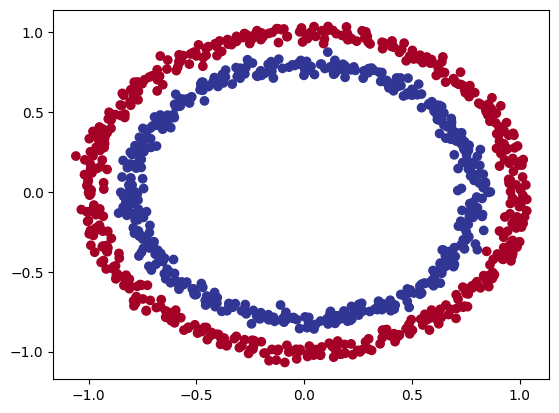

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.RdYlBu
)

In [ ]:
x.shape,  y.shape

((1000, 2), (1000,))

Modelling

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.3219 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2374 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1540 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0573 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 3.8806 - accuracy: 0.5000


In [ ]:
model.fit(x, y, epochs=200, verbose = 0)
model.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4670


[0.6931584477424622, 0.46700000762939453]

In [ ]:
#tweak model

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model2.fit(x, y, epochs=100, verbose = 0)

In [ ]:
model2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4270


[0.6945094466209412, 0.4269999861717224]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_3.fit(x, y, epochs=100, verbose = 0)

In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.5000


[0.6961264610290527, 0.5]

Visualize model's predictions

In [ ]:
import numpy as np


In [ ]:

def plot_decision_boundary(model, x, y):

  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1

  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) >1 :
    print("doing multiclass classification")

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:, 0], x[:, 1], c = y, s=40, cmap = plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())





313/313 [==============================] - 1s 3ms/step
doing binary classification


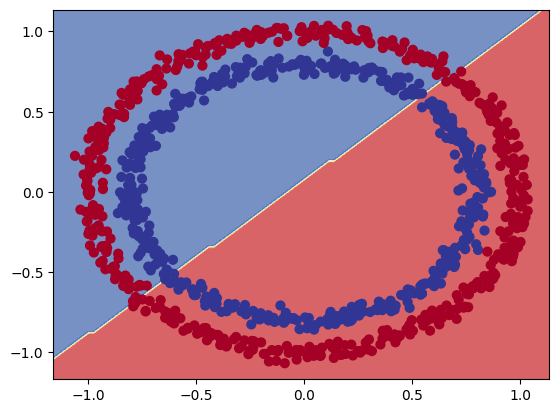

In [ ]:
plot_decision_boundary(model = model_3, x=x, y=y)

The model is predicting a straight line while this dataset has non linear pattern in it

In [ ]:
# see if model can be used for a regression problem

tf.random.set_seed(42)

x_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)


In [ ]:
x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 413.4665 - mae: 413.4665
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 264.6151 - mae: 264.6151
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 119.9694 - mae: 119.9694
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 60.2172 - mae: 60.2172
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 92.6606 - mae: 92.6606
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 65.8588 - mae: 65.8588
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 45.6795 - mae: 45.6795
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 47.4781 - mae: 47.4781
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 43.6887 - mae: 43.6887
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 43.4689 - mae: 43.4689
Epoch 11/100
5/5 [==============================] - 0

In [ ]:
y_reg_preds = model_3.predict(x_reg_test)

2/2 [==============================] - 0s 4ms/step


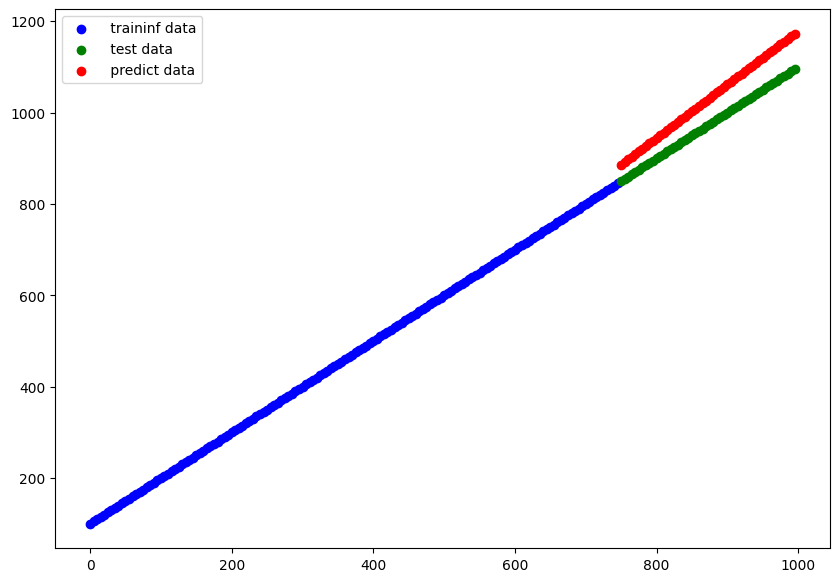

In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label=" traininf data")
plt.scatter(x_reg_test, y_reg_test,  c="g", label = " test data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label = " predict data")
plt.legend()

Non linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)

])

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = "Adam",
                metrics = ["accuracy"]
                )

history = model_4.fit(x, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.4211 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4196 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4087 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3839 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3760 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3526 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3418 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3208 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3190 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3178 - accuracy: 0.4870
Epoch 11/

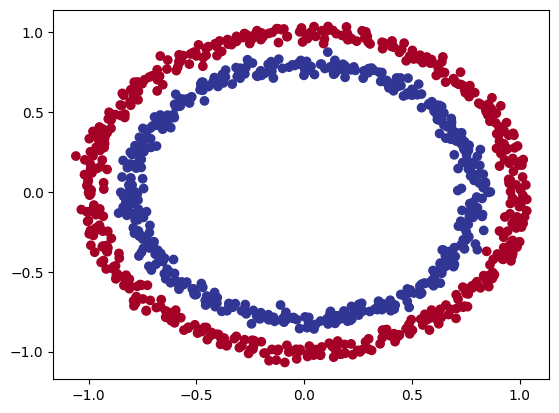

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


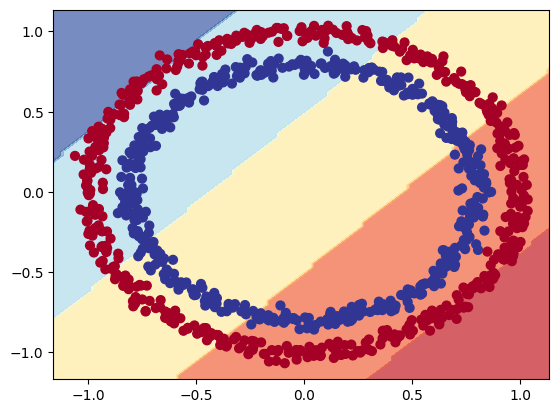

In [ ]:
plot_decision_boundary(model=model_4, x=x, y=y)

In [ ]:
# nn with non linear activation function
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_5.fit(x, y, epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7778 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7550 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6795 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6756 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6654 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6514 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6487 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6367 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6343 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6234 - accuracy: 0.4790
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


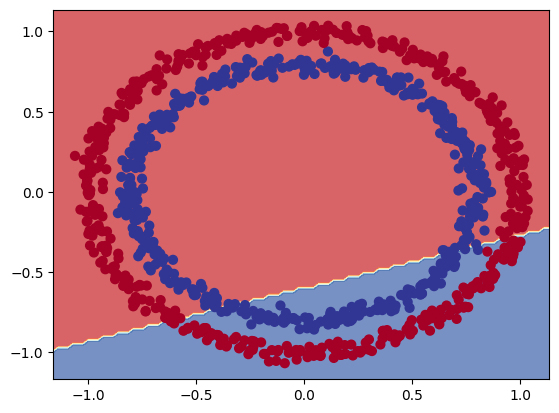

In [ ]:

plot_decision_boundary(model_5, x=x, y=y)

In [ ]:
# tweak model

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(x, y, epochs=250)


Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification


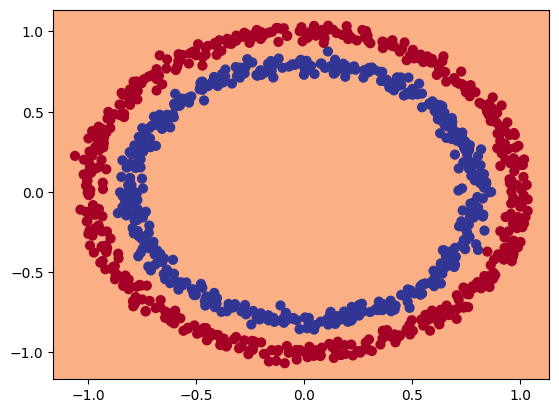

In [ ]:
plot_decision_boundary(model_6, x, y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_7.fit(x, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5020
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5010
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5060
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5070
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5040
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5100
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5100
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5080
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5120
Epoch 11/

In [ ]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9760


[0.11335903406143188, 0.9760000109672546]

313/313 [==============================] - 1s 2ms/step
doing binary classification


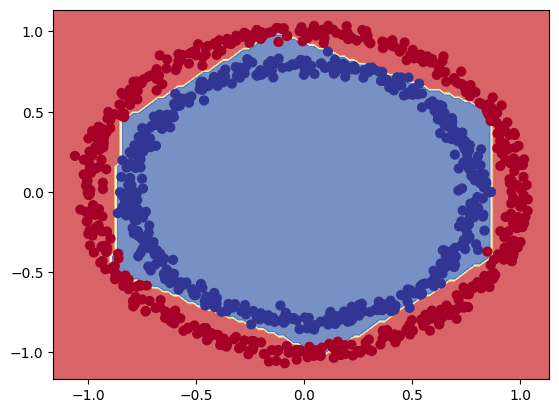

In [ ]:
plot_decision_boundary(model_7, x, y)

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

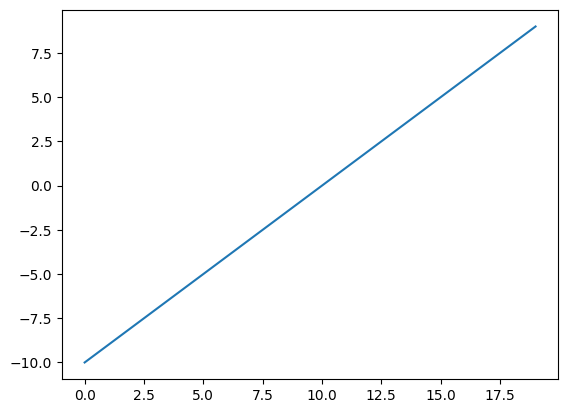

In [ ]:
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1/ (1+ tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

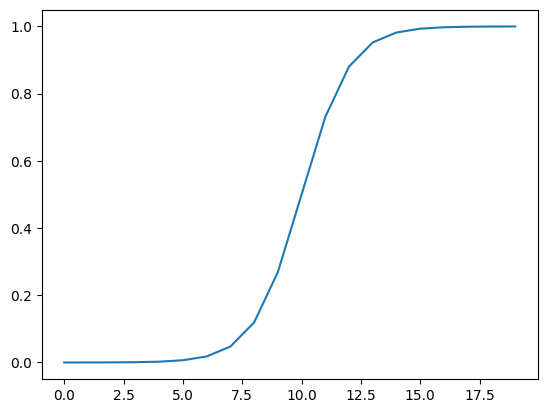

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0,x )

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

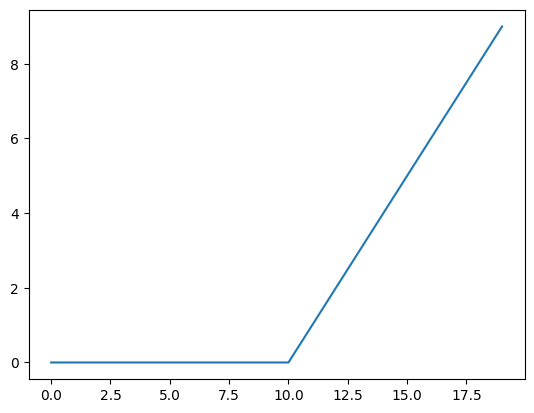

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

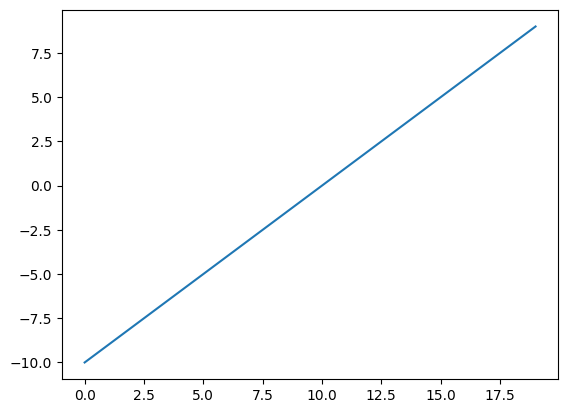

In [ ]:
plt.plot(tf.keras.activations.linear(A))

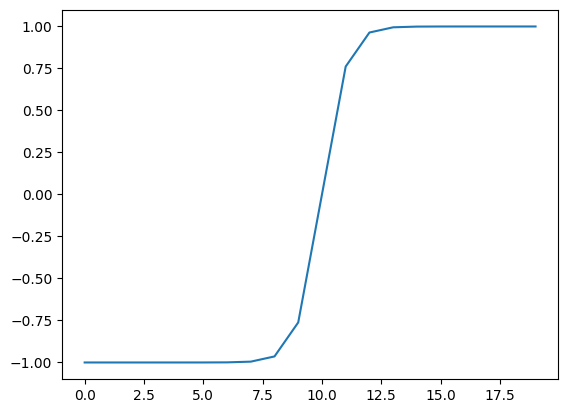

In [ ]:
plt.plot(tf.keras.activations.tanh(A))

Creating training and testing data set

In [ ]:
len(x),len(y)


(1000, 1000)

In [ ]:
x_train = x[:800]
x_test =x[800:]

y_train = y[:800]
y_test = y[800:]

In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
# recreate a model

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4863
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5063
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5063
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5263
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5663
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.5512
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.5938
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6338
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7188
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7513
Epoch 11/25
25/25 [

<Axes: >

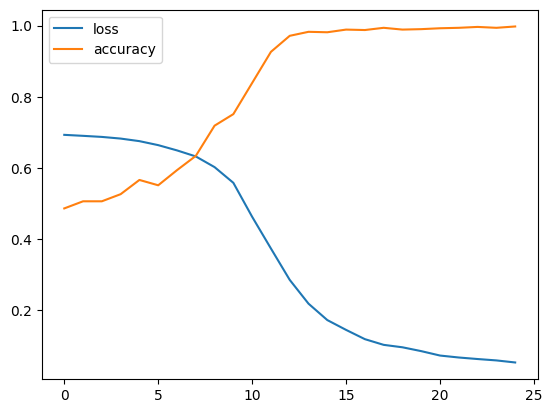

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9900


[0.057491809129714966, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


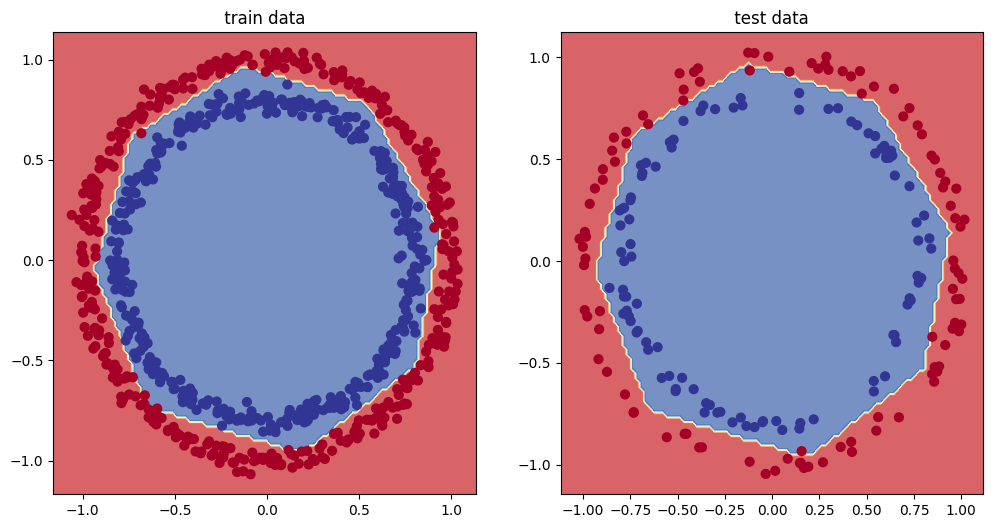

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title(' train data ')
plot_decision_boundary(model_8, x_train, y_train)
plt.subplot(1,2,2)
plt.title(' test data ')
plot_decision_boundary(model_8, x_test, y_test)

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692979,0.48625
1,0.690191,0.50625
2,0.687172,0.50625
3,0.682501,0.52625
4,0.675283,0.56625
5,0.664063,0.55125
6,0.649285,0.59375
7,0.632329,0.63375
8,0.602280,0.71875
9,0.558157,0.75125


In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss ="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

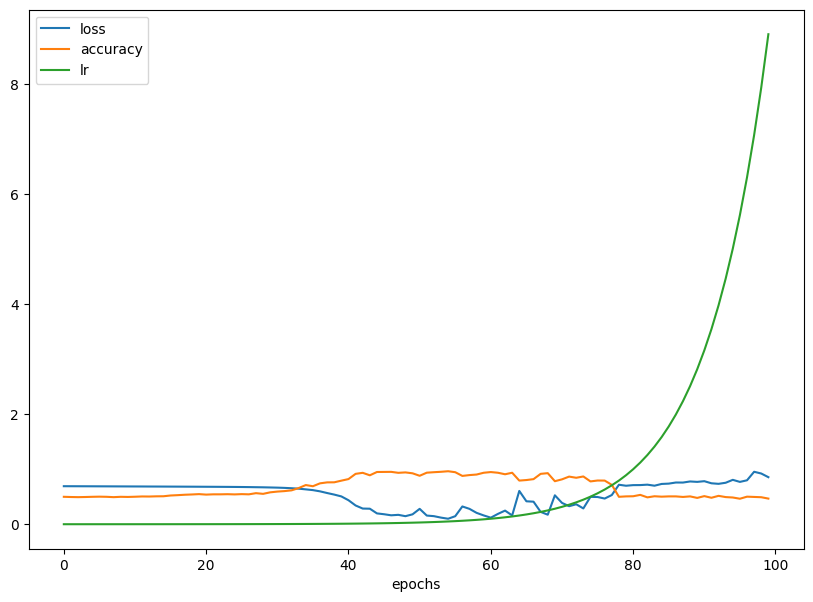

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, ' lr vs loss ')

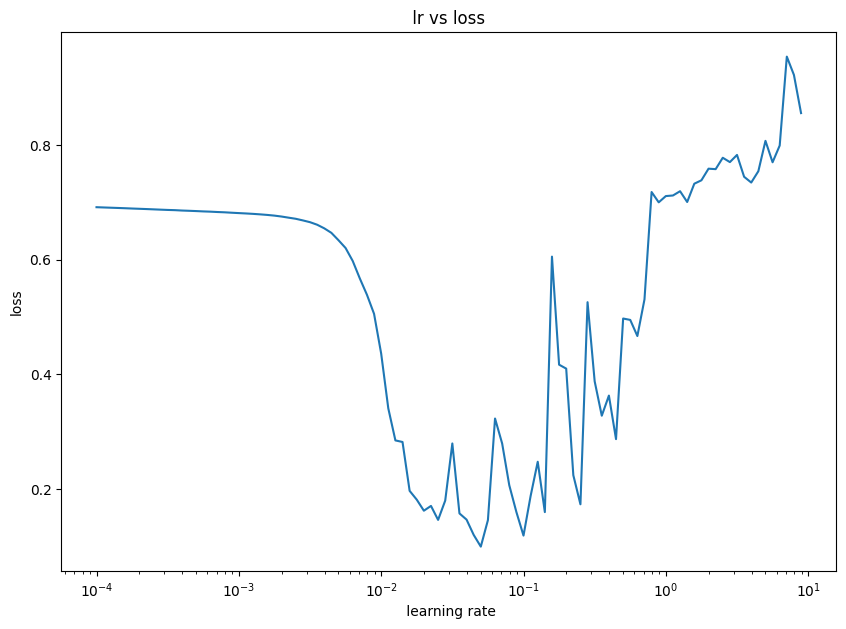

In [ ]:
# plot learnig rate vs loss

lrs = 1e-4 *(10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel(" learning rate")
plt.ylabel("loss")
plt.title(" lr vs loss ")

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5125
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5987
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6587
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.8150
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.8413
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.9325
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9550
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9762
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9862
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [ ]:
pd.DataFrame(history_9.history)

,loss,accuracy,lr
0,0.691643,0.49875,0.000100
1,0.691193,0.49500,0.000112
2,0.690752,0.49250,0.000126
3,0.690323,0.49500,0.000141
4,0.689859,0.49875,0.000158
...,...,...,...
95,0.769996,0.46375,5.623413
96,0.799189,0.50125,6.309574
97,0.954231,0.49625,7.079458
98,0.922270,0.49125,7.943282


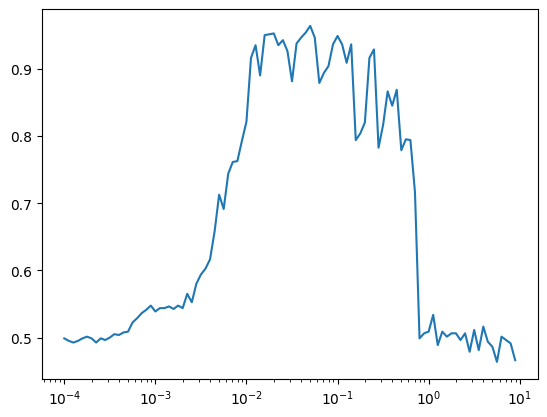

In [ ]:
plt.semilogx(history_9.history["lr"], history_9.history["accuracy"])

In [ ]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9750


[0.06976601481437683, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


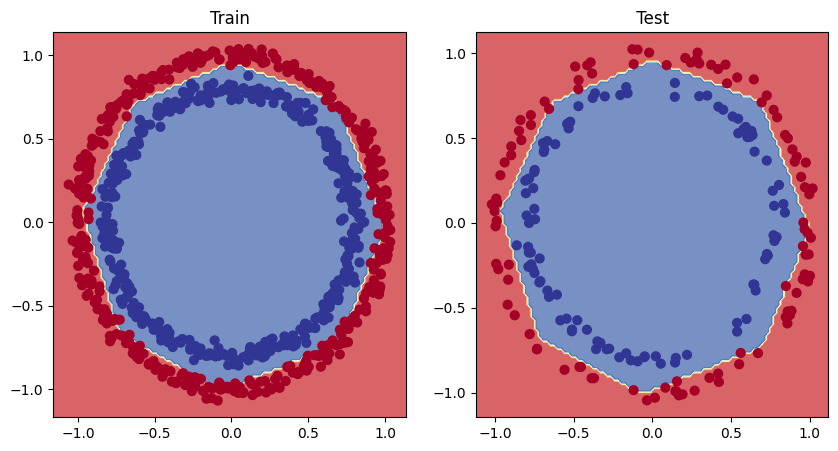

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title(" Test ")
plot_decision_boundary(model_10, x_test, y_test)

In [ ]:
loss, accuracy = model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.9750


In [ ]:
loss, accuracy

(0.06976601481437683, 0.9750000238418579)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
ypreds = model_10.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
confusion_matrix(y_test, tf.round(ypreds))

array([[96,  5],
       [ 0, 99]])

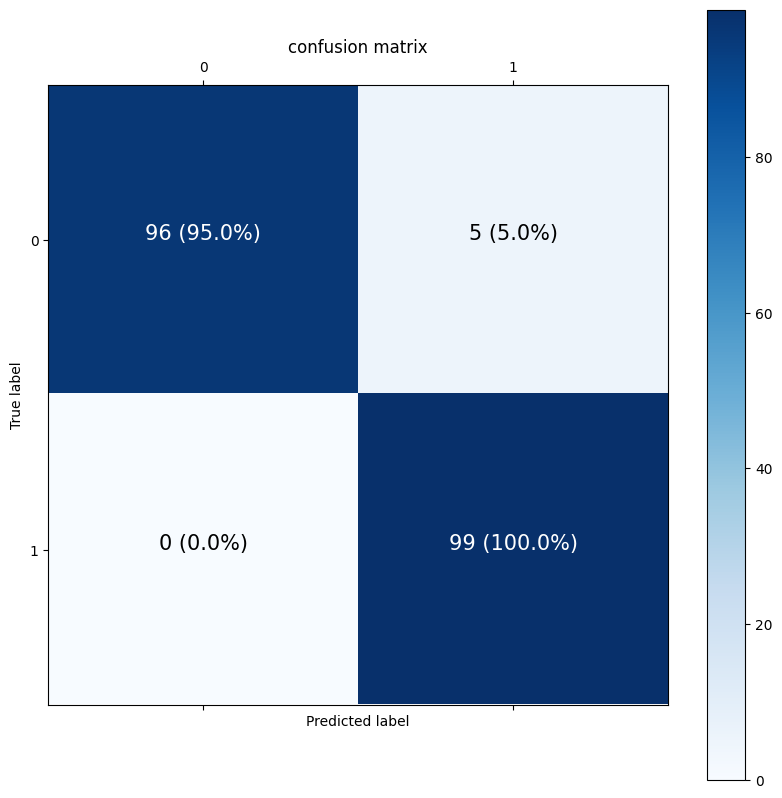

In [ ]:
import itertools

figsize = (10, 10)

#create confusion matrix

cm = confusion_matrix(y_test, tf.round(ypreds))

cm_norm = cm.astype("float") /cm.sum(axis=1)[:, np.newaxis]

n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap= plt.cm.Blues)
fig.colorbar(cax)


classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
cm_norm

array([[0.95049505, 0.04950495],
       [0.        , 1.        ]])

In [ ]:
cm.shape[0]

2

# Multiclass Classification Example

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# data is already split into training and test sets

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_data[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_labels[0]

9

In [ ]:
train_data[0].shape

(28, 28)

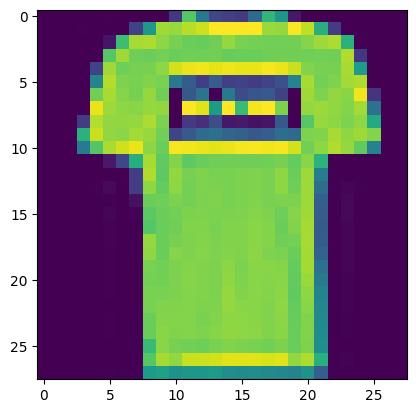

In [ ]:
#plot a single sample

plt.imshow(train_data[1])

In [ ]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt" ,"Sneaker","Bag","Ankle Boot"]

In [ ]:
len(classes)

10

Text(0.5, 1.0, 'Coat')

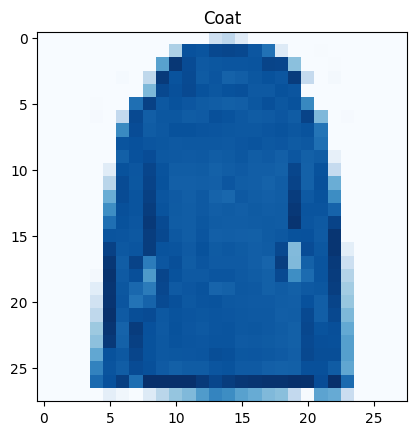

In [ ]:
index_of_choice = 2000

plt.imshow(train_data[index_of_choice], cmap=plt.cm.Blues)
plt.title(classes[train_labels[index_of_choice]])

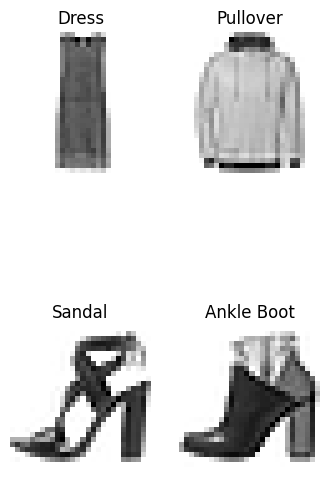

In [ ]:
#plot multiple images of fasion mnist

import random
plt.figure(figsize=(4,7) )
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(classes[train_labels[rand_index]])
  plt.axis(False)


1. Input shape= 28 * 28 - shape of one image
2. Ouput shape = 10 - 1 per class

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu" ),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1623 - accuracy: 0.1647 - val_loss: 1.9508 - val_accuracy: 0.1935
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7667 - accuracy: 0.2777 - val_loss: 1.6506 - val_accuracy: 0.3166
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6012 - accuracy: 0.3355 - val_loss: 1.5631 - val_accuracy: 0.3473
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5354 - accuracy: 0.3569 - val_loss: 1.5165 - val_accuracy: 0.3666
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5070 - accuracy: 0.3639 - val_loss: 1.4921 - val_accuracy: 0.3672
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4879 - accuracy: 0.3742 - val_loss: 1.4845 - val_accuracy: 0.3762
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3924 - accuracy: 0.4177 - val_loss: 1.3425 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data/255.0

In [ ]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation= "softmax")

])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data =(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6532 - accuracy: 0.3803 - val_loss: 1.3524 - val_accuracy: 0.4880
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2445 - accuracy: 0.5035 - val_loss: 1.1802 - val_accuracy: 0.5217
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1437 - accuracy: 0.5219 - val_loss: 1.1201 - val_accuracy: 0.5357
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0963 - accuracy: 0.5341 - val_loss: 1.0864 - val_accuracy: 0.5451
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0690 - accuracy: 0.5449 - val_loss: 1.0708 - val_accuracy: 0.5524
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0511 - accuracy: 0.5530 - val_loss: 1.0531 - val_accuracy: 0.5552
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0371 - accuracy: 0.5625 - val_loss: 1.0486 - val_accuracy:

<Axes: title={'center': 'norm'}>

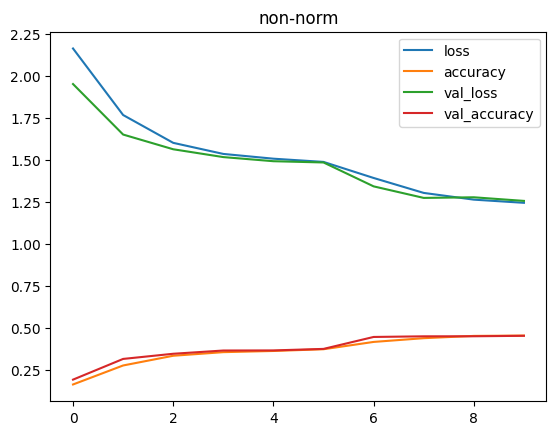

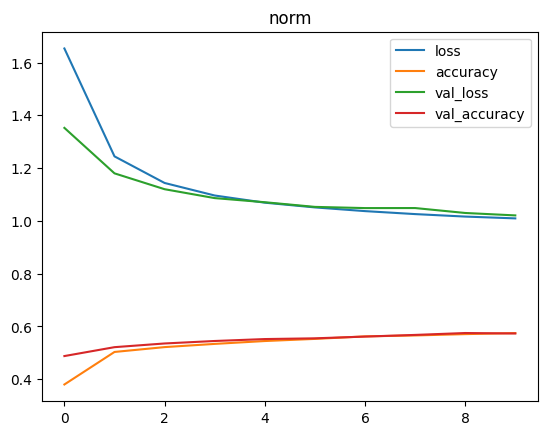

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title="non-norm")
pd.DataFrame(norm_history.history).plot(title="norm")

#Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks= [lr_scheduler]
                               )

Epoch 1/40
1875/1875 [==============================] - 10s 4ms/step - loss: 1.2569 - accuracy: 0.5317 - val_loss: 0.8835 - val_accuracy: 0.6854 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7982 - accuracy: 0.7246 - val_loss: 0.7732 - val_accuracy: 0.7385 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7101 - accuracy: 0.7566 - val_loss: 0.7255 - val_accuracy: 0.7394 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6741 - accuracy: 0.7682 - val_loss: 0.6843 - val_accuracy: 0.7642 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6568 - accuracy: 0.7716 - val_loss: 0.6731 - val_accuracy: 0.7693 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6437 - accuracy: 0.7766 - val_loss: 0.6593 - val_accuracy: 0.7803 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5

<Axes: >

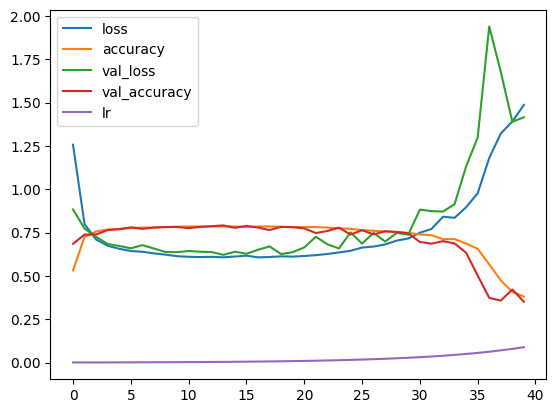

In [ ]:


pd.DataFrame(find_lr_history.history).plot()

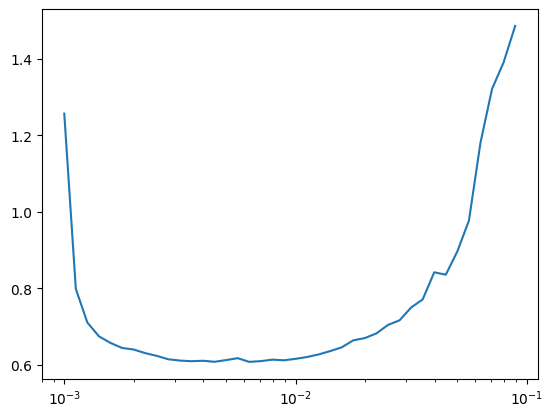

In [ ]:
plt.semilogx(find_lr_history.history["lr"], find_lr_history.history["loss"])

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"]
                 )

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5023 - accuracy: 0.4539 - val_loss: 1.0875 - val_accuracy: 0.6035
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9689 - accuracy: 0.6107 - val_loss: 0.9385 - val_accuracy: 0.6160
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8793 - accuracy: 0.6497 - val_loss: 0.8930 - val_accuracy: 0.6510
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8388 - accuracy: 0.6799 - val_loss: 0.8774 - val_accuracy: 0.6662
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8099 - accuracy: 0.6979 - val_loss: 0.8245 - val_accuracy: 0.6982
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7899 - accuracy: 0.7095 - val_loss: 0.8125 - val_accuracy: 0.7034
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7770 - accuracy: 0.7161 - val_loss: 0.7993 - val_accuracy:

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

    #create confusion matrix

    cm = confusion_matrix(y_true, tf.round(y_pred))

    cm_norm = cm.astype("float") /cm.sum(axis=1)[:, np.newaxis]

    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)

    cax = ax.matshow(cm, cmap= plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    ax.set(title="confusion matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    threshold = (cm.max() + cm.min()) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
              horizontalalignment = "center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[7.72857867e-09, 1.36686911e-04, 5.28523780e-10, 2.99434300e-09,
        1.35162495e-08, 4.43839580e-02, 2.29742483e-08, 7.38443136e-01,
        3.20221284e-06, 2.17032939e-01],
       [2.24581249e-02, 5.06306287e-06, 8.73372197e-01, 1.73680337e-06,
        1.12611223e-02, 0.00000000e+00, 9.29018706e-02, 0.00000000e+00,
        8.05440437e-12, 0.00000000e+00],
       [3.39397520e-04, 9.96515572e-01, 6.29507255e-08, 4.21257020e-04,
        5.09603638e-07, 1.21783152e-04, 3.05225403e-05, 1.62236200e-22,
        3.78280021e-07, 2.57040747e-03],
       [8.89320872e-05, 9.99377549e-01, 1.65337311e-09, 8.98711369e-05,
        9.96191485e-09, 1.26839564e-06, 2.39902147e-06, 2.20149892e-29,
        2.06990203e-09, 4.39999800e-04],
       [3.54618102e-01, 1.85230076e-02, 6.19931929e-02, 1.10795297e-01,
        7.56536722e-02, 4.30387630e-19, 3.78342777e-01, 1.74359005e-37,
        7.40642572e-05, 1.05994290e-24]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), classes[tf.argmax(y_probs[0])]


(array([7.72857867e-09, 1.36686911e-04, 5.28523780e-10, 2.99434300e-09,
        1.35162495e-08, 4.43839580e-02, 2.29742483e-08, 7.38443136e-01,
        3.20221284e-06, 2.17032939e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [ ]:
confusion_matrix(test_labels, y_preds)

array([[703,   2,  39, 127,  33,   4,  76,   0,  16,   0],
       [  3, 900,   4,  72,   3,   3,  12,   0,   3,   0],
       [ 26,   1, 618,  19, 204,   2, 120,   0,  10,   0],
       [ 48,  15,   8, 822,  26,   5,  67,   0,   9,   0],
       [  3,   0, 177,  52, 649,   1,  92,   0,  26,   0],
       [  0,   7,   0,   3,   0, 830,   0, 118,  22,  20],
       [144,   1, 198,  80, 367,   4, 174,   0,  32,   0],
       [  0,   0,   0,   0,   0,  67,   0, 878,   1,  54],
       [  0,   0,   5,  12,  40,  32,   9,   3, 898,   1],
       [  0,   3,   0,   1,   1,  28,   0, 111,   0, 856]])

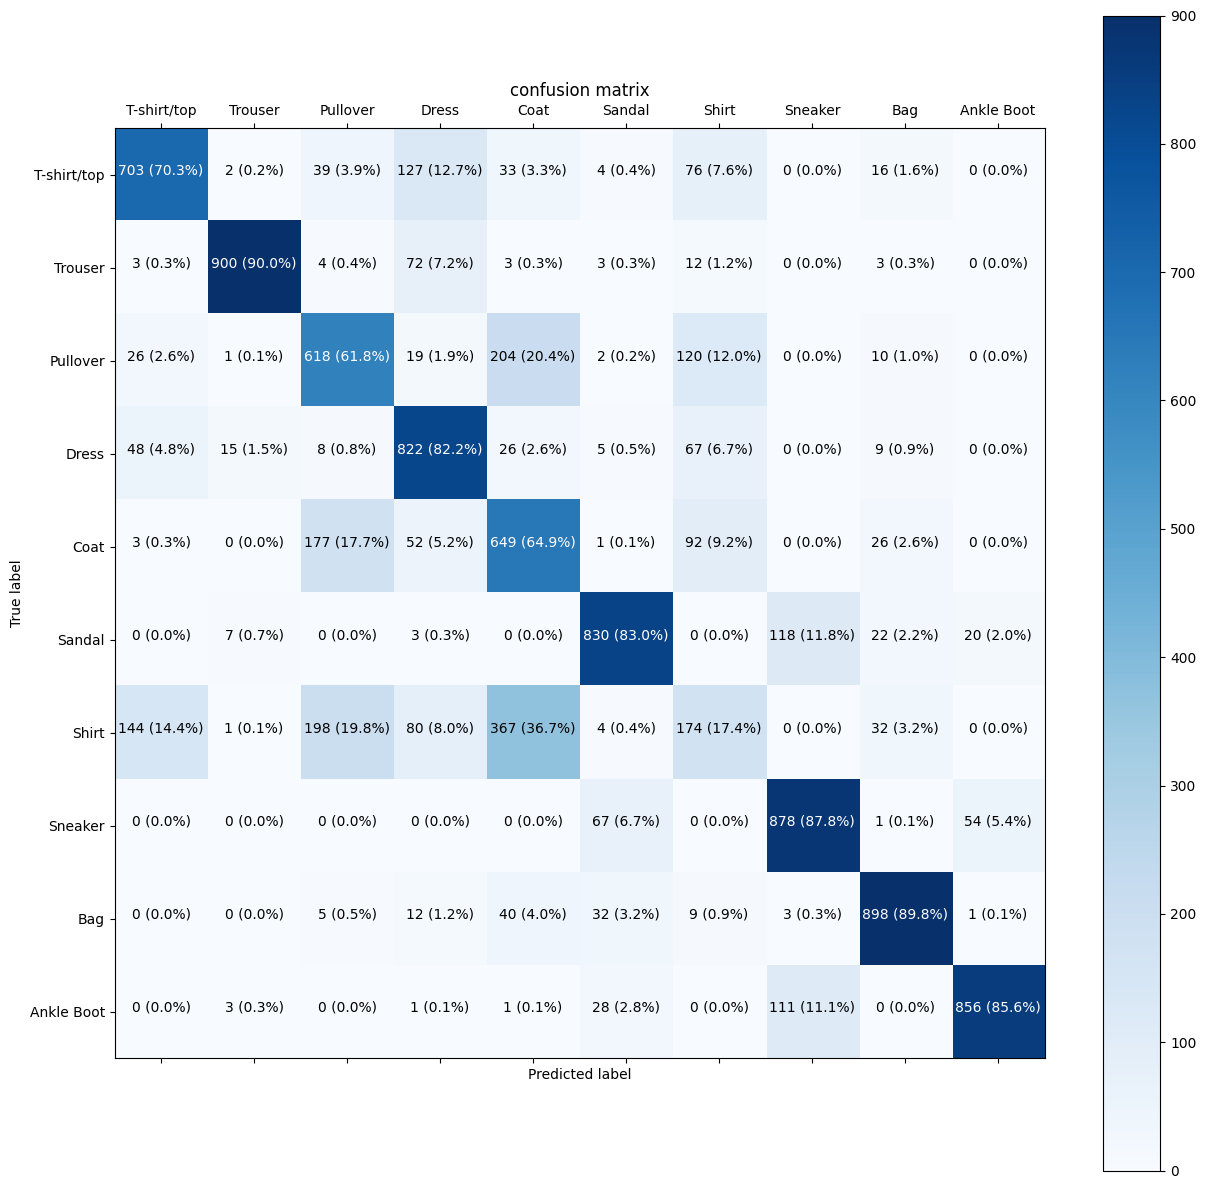

In [ ]:
make_confusion_matrix(test_labels, y_preds,classes, figsize=(15,15), text_size=10
)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label==true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {}{:2.0f}% (True:{})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 [==============================] - 0s 23ms/step


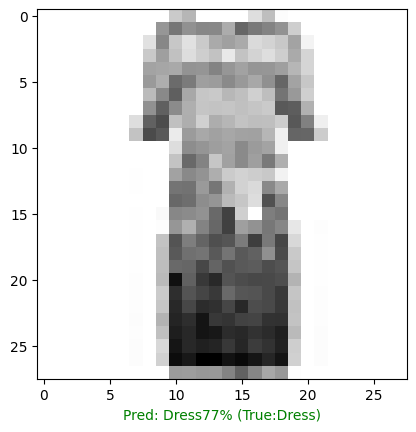

In [ ]:
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=classes)

# What patterns is our model learning

In [ ]:
model_14.layers

In [ ]:
model_14.layers[1]

In [ ]:
weights, biases = model_14.layers[1].get_weights()

In [ ]:
weights, weights.shape

(array([[ 2.6492161e-01,  5.5129290e-02,  4.1871288e-01,  5.7357311e-02],
        [-1.0512111e-01, -5.3000368e-02,  1.4847203e+00, -2.2697449e-04],
        [ 8.3382791e-01,  1.9421881e-02,  1.3576831e-01, -7.2452031e-02],
        ...,
        [-2.5009063e-01,  6.5592420e-03,  3.6108711e-01, -5.7810020e-02],
        [-4.2347682e-01,  7.7424161e-02,  4.5274943e-01,  7.1823820e-03],
        [ 1.4532672e-01, -4.5395494e-02, -1.3096996e-02,  3.0815527e-03]],
       dtype=float32),
 (784, 4))

In [ ]:
biases, biases.shape

(array([ 2.7807755 , -0.02177726,  2.709747  , -0.02931461], dtype=float32),
 (4,))

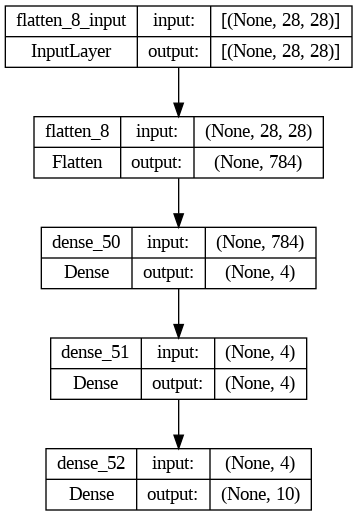

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)